# Análise Exploratória - Entidades sem Fins Lucrativos Impedidas

<div style="text-align:justify">
Este notebook realiza uma análise exploratória sobre os dados de Cadastro de Entidades sem Fins Lucativos Impedidas (CEPIM), disponíveis no Portal da Transparência e Controladoria Geral da União (CGU), acessíveis através do [Link](http://www.portaltransparencia.gov.br/downloads/snapshot.asp?c=CEPIM#get).
</div>

## Carregando Pacotes

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import unicodedata
import re

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Carregando Dados

<div style="text-align:justify">
Os dados carregados apresentam: <br><br>
CNPJ Entidade; Nome Entidade; Número Convênio; Órgão Concedente; e Motivo Impedimento.
</div>

In [2]:
dataset = pd.read_csv("../datasets/sancoes/20180402_CEPIM.csv", sep='\t', encoding='latin1')
dataset.count()

CNPJ Entidade         4662
Nome Entidade         4662
Número Convênio       4662
Órgão Concedente      4662
Motivo Impedimento    4662
dtype: int64

## Hipóteses de Análise:

- H1: Existe alguma predominância pelo órgão concedente
- H2: Existe predominância por entidade
- H3: Existe predominãncia pelo motivo de impedimento

### H1: Predominância por Órgão Concedente

<div style="text-align:justify">
Mais de 50% das sanções se concentram nos cinco primeiros órgãos concedentes. Ministério do Turismo, Presidência da República, Ministério da Cultura, Ministério da Saúde e Ministério da educação; respectivamente.
</div>

In [3]:
orgao = dataset[u"Órgão Concedente"].value_counts(normalize=True).head(10)
orgao

MINISTERIO DO TURISMO                            0.185972
PRESIDENCIA DA REPUBLICA                         0.180824
MINISTERIO DA CULTURA                            0.116259
MINISTERIO DA SAUDE                              0.092879
MINISTERIO DA EDUCACAO                           0.064779
MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES    0.058559
MINISTERIO DOS DIREITOS HUMANOS                  0.050193
MINISTERIO DO ESPORTE                            0.049979
MINIST. DA AGRICUL.,PECUARIA E ABASTECIMENTO     0.038825
MINISTERIO DO TRABALHO                           0.038181
Name: Órgão Concedente, dtype: float64

#### Representação Gráfica

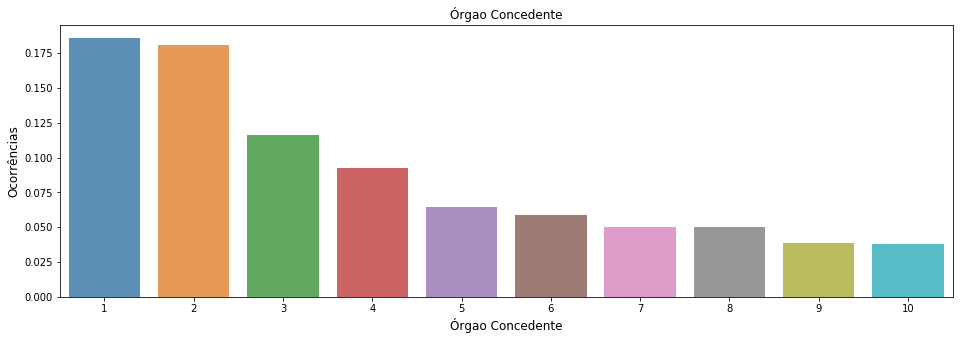

In [4]:
plt.figure(figsize=(16, 5))
sns.barplot(range(1, orgao.count() + 1), orgao.values, alpha=0.8)
plt.title(u"Órgao Concedente")
plt.ylabel(u"Ocorrências", fontsize=12)
plt.xlabel(u"Órgao Concedente", fontsize=12)
plt.show()

### H2: Predominância por Entidade

<div style="text-align:justify">
Não existe predominância por entidade, muito embora diversas entidades tenham mais de um registro de impedimento.
</div>

In [5]:
dataset[u"Nome Entidade"].value_counts(normalize=True).head(10)

ASSOCIACAO SERGIPANA DE BLOCOS DE TRIO          0.014586
ASSOCIACAO NACIONAL DE COOPERACAO AGRICOLA      0.008366
PREMIUM AVANCA BRASIL                           0.008366
FUNDACAO JOSE AMERICO                           0.008151
FUNDACAO RIO MADEIRA                            0.007508
MUITO ESPECIAL                                  0.007079
FUNDACAO DE GESTAO E INOVACAO                   0.006221
FUNDACAO DE APOIO A PESQUISA E A EXTENSAO       0.005577
ASSOCIACAO DE ENSINO SUPERIOR DE NOVA IGUACU    0.004934
IEC INSTITUTO EDUCAR E CRESCER                  0.004719
Name: Nome Entidade, dtype: float64

### H3: Predominância pelo Motivo de Impedimento

<div style="text-align:justify">
Os quatro primeiros motivos de impedimentos, juntos, representam aproximadamente 95% de todos os impedimentos realizados.
</div>

In [6]:
motivo = dataset[u"Motivo Impedimento"].value_counts(normalize=True).head(10)
motivo

MOTIVO NÃO ESPECIFICADO                                                   0.299657
IRREGULARIDADES NA PRESTAÇÃO DE CONTAS (ATRASO, OMISSÃO OU IMPUGNAÇÃO)    0.274775
IRREGULARIDADES NA EXECUÇÃO                                               0.188760
INSTAURAÇÃO DE TCE                                                        0.187044
INEXECUÇÃO DO OBJETO (TOTAL OU PARCIAL)                                   0.026384
INSCRICAO POR DECISAO DO T.C.U.                                           0.022308
APRESENTOU P.C. PARCIAL E/OU FINAL                                        0.000429
APRESENTOU P.C. PARCIAL OU GLOBAL                                         0.000215
O CONVENENTE APRESENTOU A P.C. FINAL                                      0.000215
TOMADA DE CONTAS BAIXADA PELO TCU                                         0.000215
Name: Motivo Impedimento, dtype: float64

#### Representação Gráfica

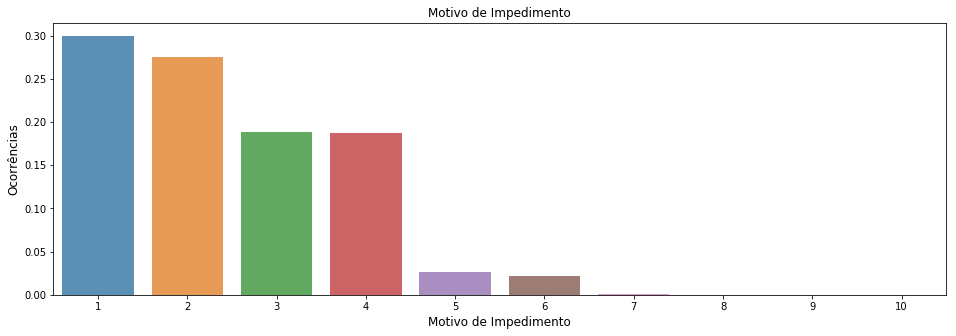

In [7]:
plt.figure(figsize=(16, 5))
sns.barplot(range(1, motivo.count() + 1), motivo.values, alpha=0.8)
plt.title(u"Motivo de Impedimento")
plt.ylabel(u"Ocorrências", fontsize=12)
plt.xlabel(u"Motivo de Impedimento", fontsize=12)
plt.show()

## Conclusões

- Mais de 50% das sanções se concentram em cinco órgãos concedentes. Existe predominância
- Embora algumas entidades tenham mais de um impedimento, não existe predominância por entidade
- 95% dos impedimentos se concentram em quatro motivos